# EDA

## 1. Loading Packages

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

In [54]:
data = pd.read_csv('train.csv')
df = data.copy()

### Basic Structure

In [55]:
df.shape

(891, 12)

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [58]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Rice, Master. Eugene",male,347082,G6,S
freq,1,577,7,4,644


In [60]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Rice, Master. Eugene",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Completeness

In [61]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. Exploration

### 3.1 Exploration of Complete & Important Variables

Our response variable in the training set is complete, as well as Sex and Pclass, which seem two of the most important predictors.

**Survival**

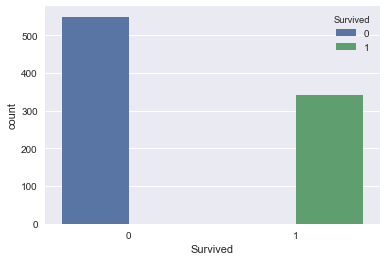

In [62]:
sns.countplot(x='Survived', hue='Survived', data=df);

**Gender & Survival**

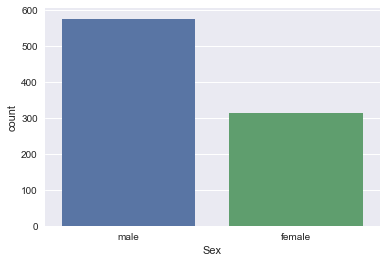

In [63]:
sns.countplot(x='Sex', data=df);

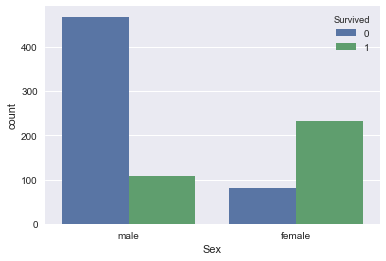

In [64]:
sns.countplot(x='Sex', hue='Survived', data=df);

**Passenger Class & Survival**

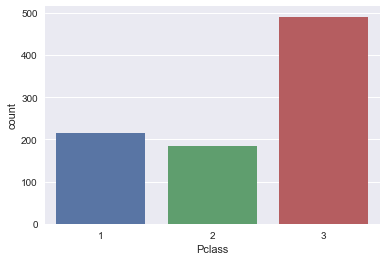

In [65]:
sns.countplot(x='Pclass', data=df);

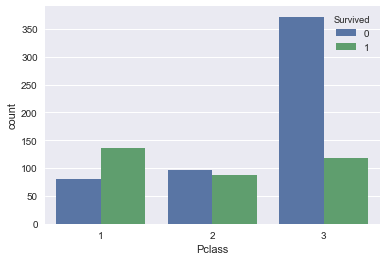

In [66]:
sns.countplot(x='Pclass', hue='Survived', data=df);

**Passenger Class, Gender & Survival**

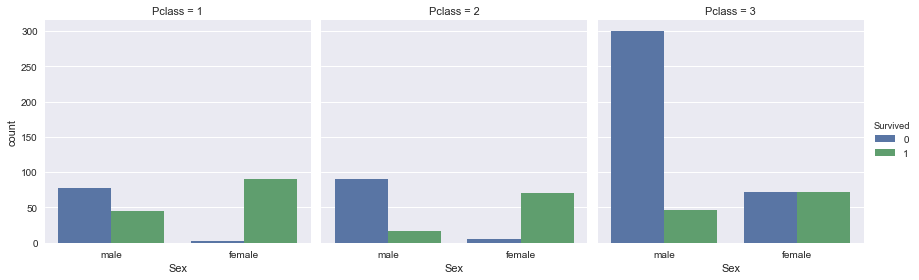

In [67]:
sns.factorplot(x='Sex', col='Pclass', hue='Survived', data=df, kind='count');

### 3.2 What's in the name?

In [68]:
df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

**Extracting & Analyzing Titles**

In [69]:
df['Title'] = df['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [70]:
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Capt          1
Mme           1
Jonkheer      1
Sir           1
Don           1
Lady          1
Countess      1
Ms            1
Name: Title, dtype: int64

___Dividing Titles into bigger categories___

The term *Mademoiselle* is a French familiar title, abbreviated **Mlle**, traditionally given to an unmarried woman. The equivalent in English is "Miss". However, the courtesy title "Madame" is accorded women where their marital status is unknown.

In [71]:
df['Title'] = df['Title'].replace('Mlle', 'Miss')

In France, one traditionally calls a young, unmarried woman Mademoiselle – Mlle for short – and an older, married woman _Madame_, whose abbreviation is **Mme**.

In [72]:
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [73]:
i = df[~df['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master'])].index
df.loc[i, 'Title'] = 'Rare Title'

In [74]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare Title'], dtype=object)

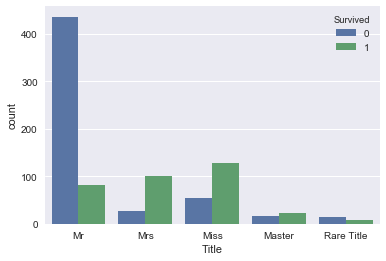

In [75]:
sns.countplot(x='Title', hue='Survived', data=df);

### 3.3 Travelling Alone vs. Travelling in groups

**3.3.1 Family Size**

In [76]:
df['Fsize'] = df['SibSp'] + df['Parch']+1


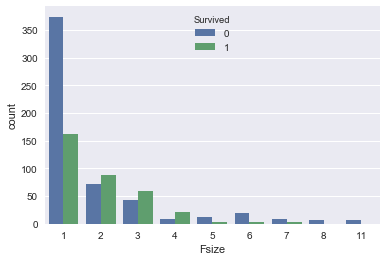

In [77]:
sns.countplot(x='Fsize', hue='Survived', data=df);

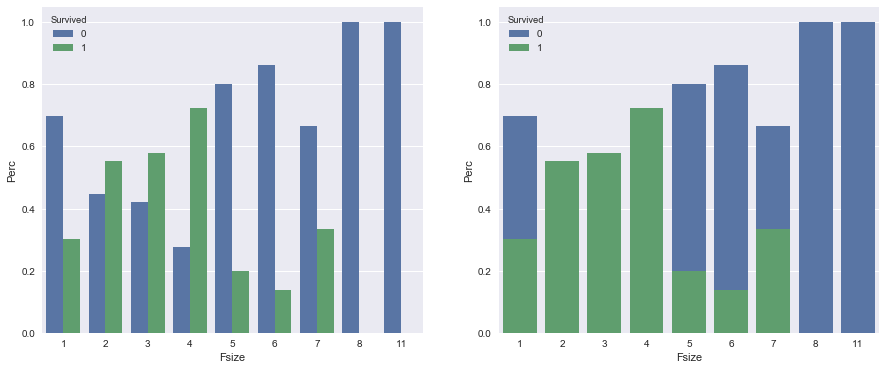

In [78]:
temp = df.groupby('Fsize')['Survived'].value_counts(normalize=True).reset_index(name='Perc')
plt.figure(figsize=(15,6));
plt.subplot(121)
sns.barplot(x='Fsize', y='Perc', hue='Survived', data=temp, dodge=True);
plt.subplot(122)
sns.barplot(x='Fsize', y='Perc', hue='Survived', data=temp, dodge=False);

**3.3.2 How many people booked together?**

_Apart from families, there could be groups of friends travelling together._

In [79]:
temp = df['Ticket'].value_counts().reset_index(name='Tsize')
df = df.merge(temp, left_on='Ticket', right_on='index').drop('index', axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,Mr,2,2


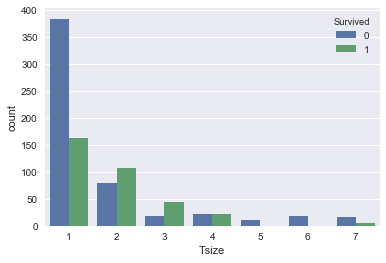

In [80]:
sns.countplot(x='Tsize', hue='Survived', data=df);

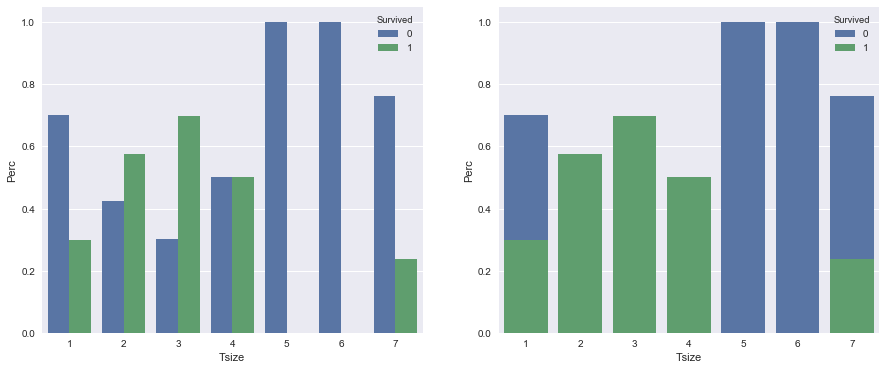

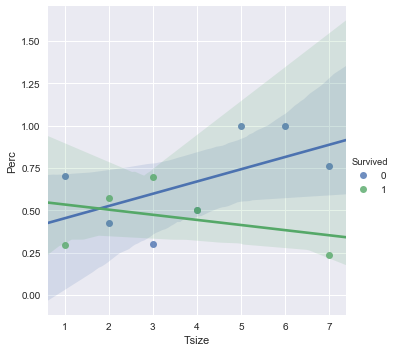

In [81]:
temp = df.groupby('Tsize')['Survived'].value_counts(normalize=True).reset_index(name='Perc')
plt.figure(figsize=(15,6));
plt.subplot(121)
sns.barplot(x='Tsize', y='Perc', hue='Survived', data=temp, dodge=True);
plt.subplot(122)
sns.barplot(x='Tsize', y='Perc', hue='Survived', data=temp, dodge=False);
sns.lmplot(x='Tsize',y='Perc',hue='Survived',data=temp);

**3.3.3 Consolidating family & friends**

In [82]:
df['Group'] = df[['Tsize', 'Fsize']].max(axis=1)

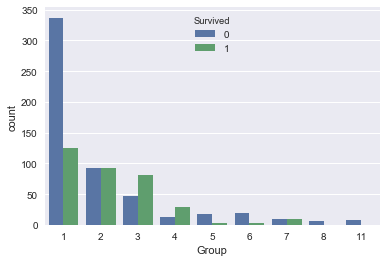

In [83]:
sns.countplot(x='Group', hue='Survived', data=df);

In [84]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,Mr,2,2,2


In [85]:
df['GrpSize'] = ''
df.loc[df['Group']==1, 'GrpSize'] = df.loc[df['Group']==1, 'GrpSize'].replace('', 'solo')
df.loc[df['Group']==2, 'GrpSize'] = df.loc[df['Group']==2, 'GrpSize'].replace('', 'couple')
df.loc[(df['Group']<=4) & (df['Group']>=3), 'GrpSize'] = df.loc[(df['Group']<=4) & (df['Group']>=3), 'GrpSize'].replace('', 'group')
df.loc[df['Group']>4, 'GrpSize'] = df.loc[df['Group']>4, 'GrpSize'].replace('', 'large group')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,2,couple
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2,couple
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,1,solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2,2,couple
4,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,Mr,2,2,2,couple
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,1,solo
6,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,1,1,1,solo
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,1,1,1,solo
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,5,4,5,large group
9,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S,Miss,5,4,5,large group


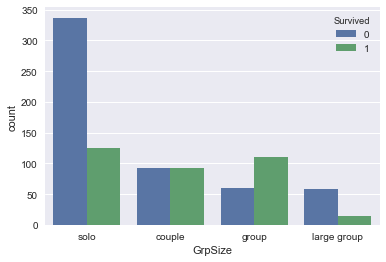

In [86]:
sns.countplot(x='GrpSize', order=['solo', 'couple', 'group', 'large group'], hue='Survived', data=df);

### 3.4 Effect of Fare

In [87]:
df['Fare'].isnull().sum()

0

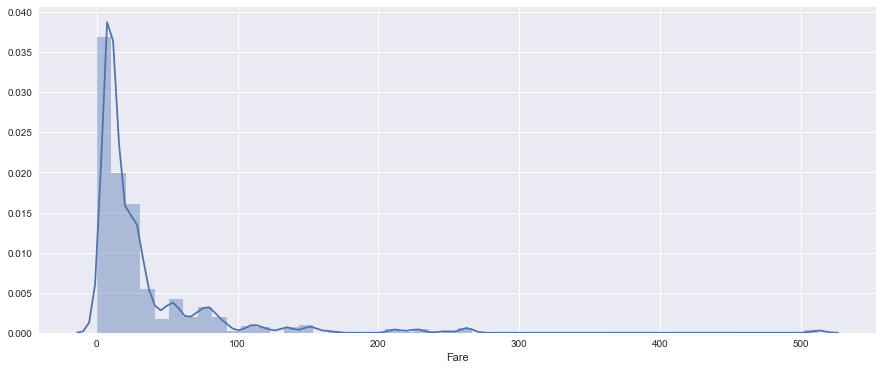

In [88]:
plt.subplots(figsize=(15,6))
sns.distplot(df['Fare']);

In [89]:
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
         9.8458,  79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7

In [90]:
df[df['Fare'] < 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize


In [91]:
df[df['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize
266,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr,1,4,4,group
267,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr,1,4,4,group
268,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr,1,4,4,group
269,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr,1,4,4,group
366,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr,1,1,1,solo
386,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Mr,1,3,3,group
387,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,Mr,1,3,3,group
388,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,Mr,1,3,3,group
592,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,Mr,1,1,1,solo
715,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,Mr,1,1,1,solo


In [92]:
df.loc[(df['Fare'] == 0) & (df['Pclass'] == 1), 'Fare'] = df[df['Pclass'] == 1]['Fare'].mean()
df.loc[(df['Fare'] == 0) & (df['Pclass'] == 2), 'Fare'] = df[df['Pclass'] == 2]['Fare'].mean()
df.loc[(df['Fare'] == 0) & (df['Pclass'] == 3), 'Fare'] = df[df['Pclass'] == 3]['Fare'].mean()

In [93]:
df['FareCat'] = ''
df.loc[df['Fare']<=10, 'FareCat'] = '0-10'
df.loc[(df['Fare']>10) & (df['Fare']<=25), 'FareCat'] = '10-25'
df.loc[(df['Fare']>25) & (df['Fare']<=40), 'FareCat'] = '25-40'
df.loc[(df['Fare']>40) & (df['Fare']<=70), 'FareCat'] = '40-70'
df.loc[(df['Fare']>70) & (df['Fare']<=100), 'FareCat'] = '70-100'
df.loc[df['Fare']>100, 'FareCat'] = '100+'
df[['Fare', 'FareCat']].head(10)

,Fare,FareCat
0,7.2500,0-10
1,71.2833,70-100
2,7.9250,0-10
3,53.1000,40-70
4,53.1000,40-70
5,8.0500,0-10
6,8.4583,0-10
7,51.8625,40-70
8,21.0750,10-25
9,21.0750,10-25


In [94]:
df['Fare'].unique()

array([  7.25      ,  71.2833    ,   7.925     ,  53.1       ,
         8.05      ,   8.4583    ,  51.8625    ,  21.075     ,
        11.1333    ,  30.0708    ,  16.7       ,  26.55      ,
        31.275     ,   7.8542    ,  16.        ,  29.125     ,
        13.        ,  18.        ,   7.225     ,  26.        ,
         8.0292    ,  35.5       ,  31.3875    , 263.        ,
         7.8792    ,   7.8958    ,  27.7208    , 146.5208    ,
         7.75      ,  10.5       ,  82.1708    ,  52.        ,
         7.2292    ,  11.2417    ,   9.475     ,  21.        ,
        41.5792    ,  15.5       ,  21.6792    ,  17.8       ,
        39.6875    ,   7.8       ,  76.7292    ,  61.9792    ,
        27.75      ,  46.9       ,  80.        ,  83.475     ,
        27.9       ,  15.2458    ,   8.1583    ,   8.6625    ,
        73.5       ,  14.4542    ,  56.4958    ,   7.65      ,
        29.        ,  12.475     ,   9.        ,   9.5       ,
         7.7875    ,  47.1       ,  15.85      ,  34.37

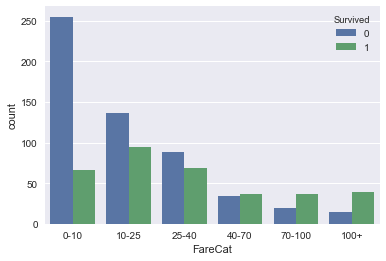

In [95]:
sns.countplot(x='FareCat', order=['0-10', '10-25', '25-40', '40-70', '70-100', '100+'], hue='Survived', data=df);

**Does ticket price correspond to group size?**

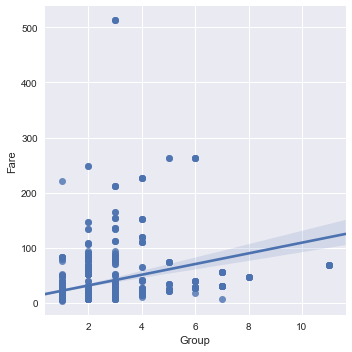

In [96]:
sns.lmplot(x='Group', y='Fare', data=df);

In [97]:
df['FarePP'] = df['Fare']/df['Group']

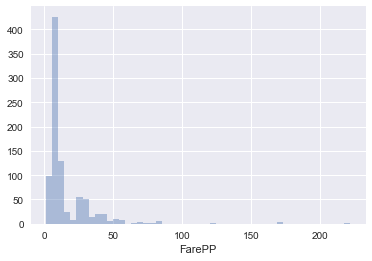

In [98]:
sns.distplot(df['FarePP'], kde=False);

### 3.5 Dropping Cabin?

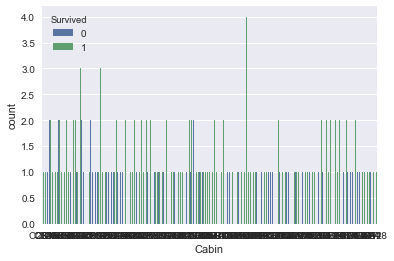

In [99]:
sns.countplot(x='Cabin', hue='Survived', data=df);

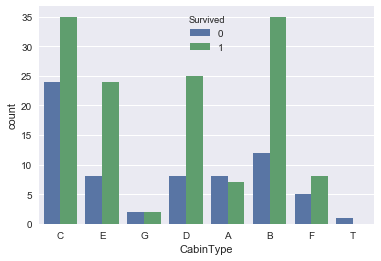

In [100]:
df['CabinType'] = df['Cabin'].str[0]
sns.countplot(x='CabinType', hue='Survived', data=df);

### 3.6 Effect of Embarked variable

_C = Cherbourg(France), Q = Queenstown(Ireland), S = Southampton(England)_

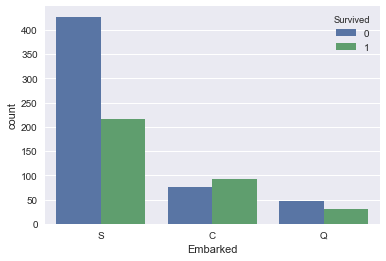

In [101]:
sns.countplot(x='Embarked', hue='Survived', data=df);

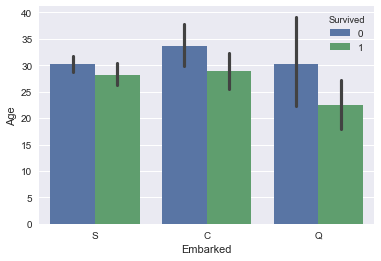

In [102]:
sns.barplot(x='Embarked', y='Age', hue='Survived', data=df);

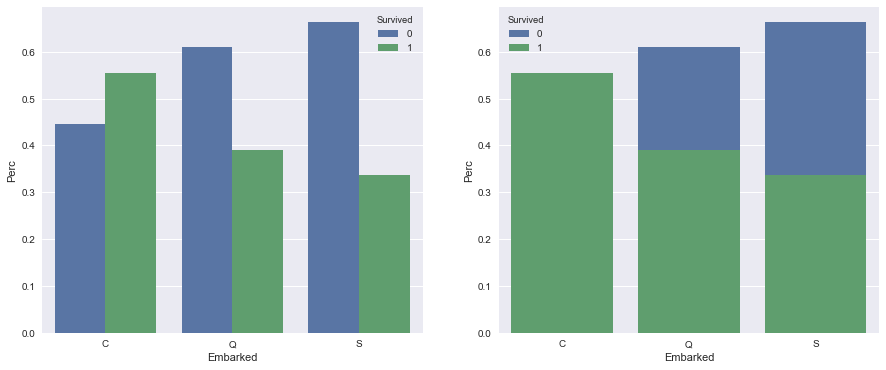

In [103]:
temp = df.groupby('Embarked')['Survived'].value_counts(normalize=True).reset_index(name='Perc')
plt.figure(figsize=(15,6));
plt.subplot(121)
sns.barplot(x='Embarked', y='Perc', hue='Survived', data=temp, dodge=True);
plt.subplot(122)
sns.barplot(x='Embarked', y='Perc', hue='Survived', data=temp, dodge=False);

***Engineered Features***

In [104]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrpSize,FareCat,FarePP,CabinType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,2,couple,0-10,3.62500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,2,couple,70-100,35.64165,C


## 4. Missing Values

### 4.1 Age

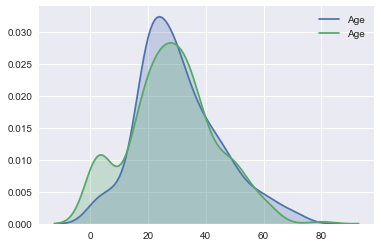

In [105]:
sns.kdeplot(df[df['Survived'] == 0]['Age'].dropna(), shade=True);
sns.kdeplot(df[df['Survived'] == 1]['Age'].dropna(), shade=True);

In [106]:
temp = df[df['Age'].isnull() == False]

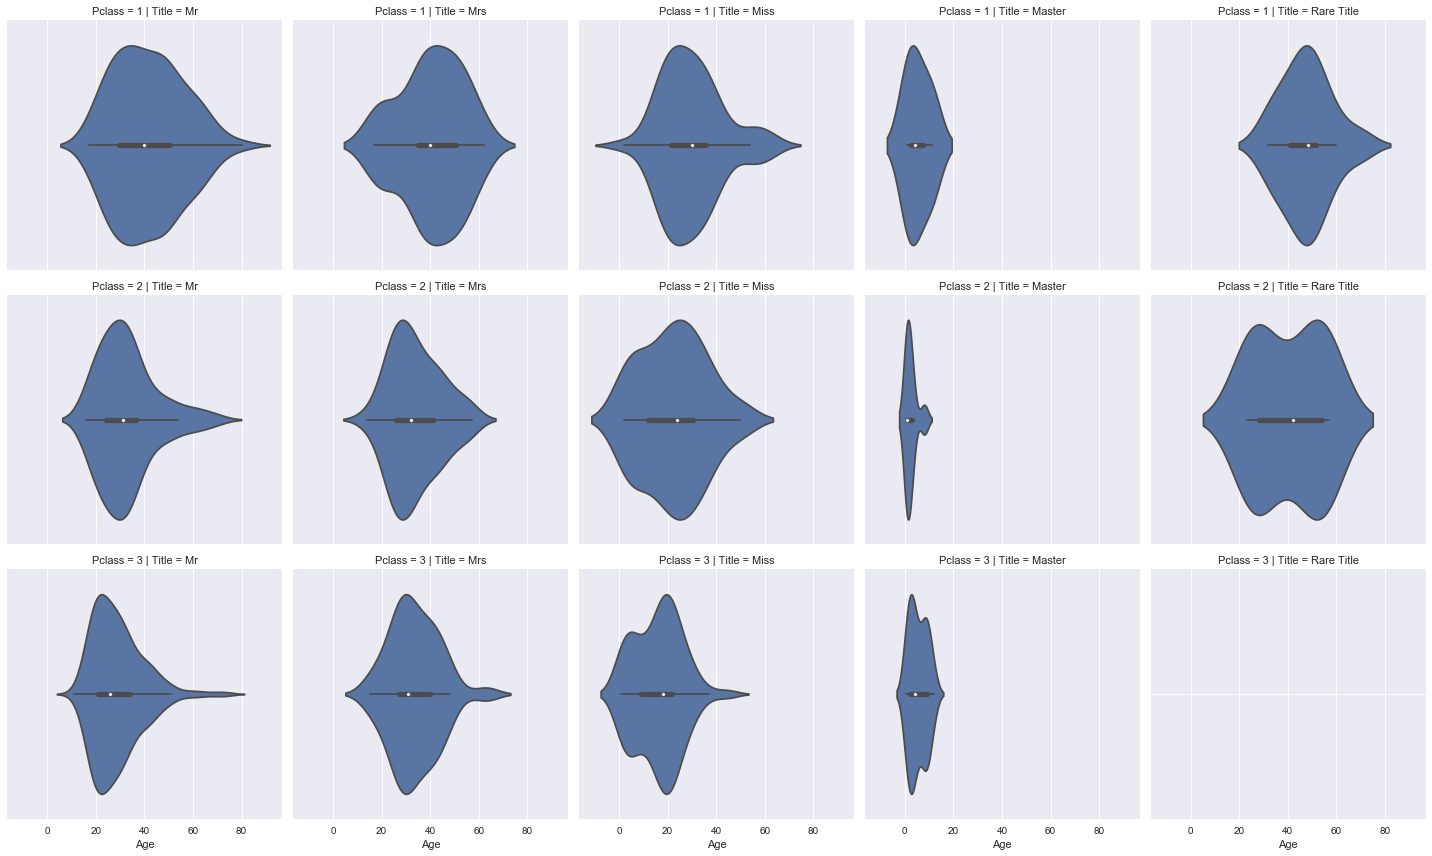

In [107]:
sns.factorplot(kind='violin', x='Age', split='Sex', col='Title', row='Pclass', data=temp);

In [108]:
for t in df['Title'].unique():
    for p in df['Pclass'].unique():
        df.loc[(df['Title'] == t) & (df['Pclass'] == p) & (df['Age'].isnull()), 'Age'] = df.loc[(df['Title'] == t) & (df['Pclass'] == p), 'Age'].median()

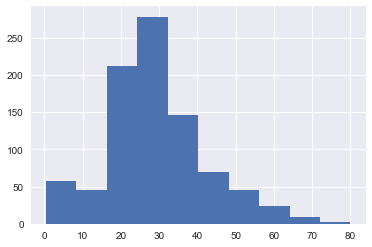

In [109]:
df['Age'].hist();

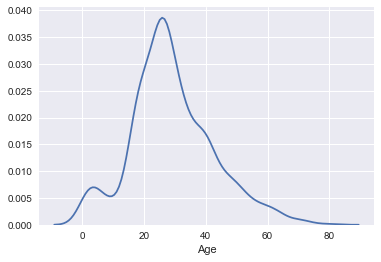

In [110]:
sns.distplot(df['Age'], hist=False);

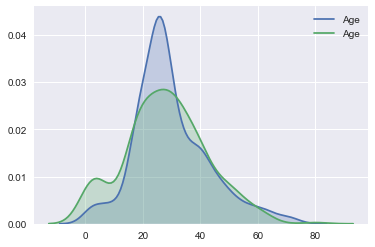

In [111]:
sns.kdeplot(df[df['Survived'] == 0]['Age'], shade=True);
sns.kdeplot(df[df['Survived'] == 1]['Age'], shade=True);

In [112]:
df['Age'].isnull().sum()

0

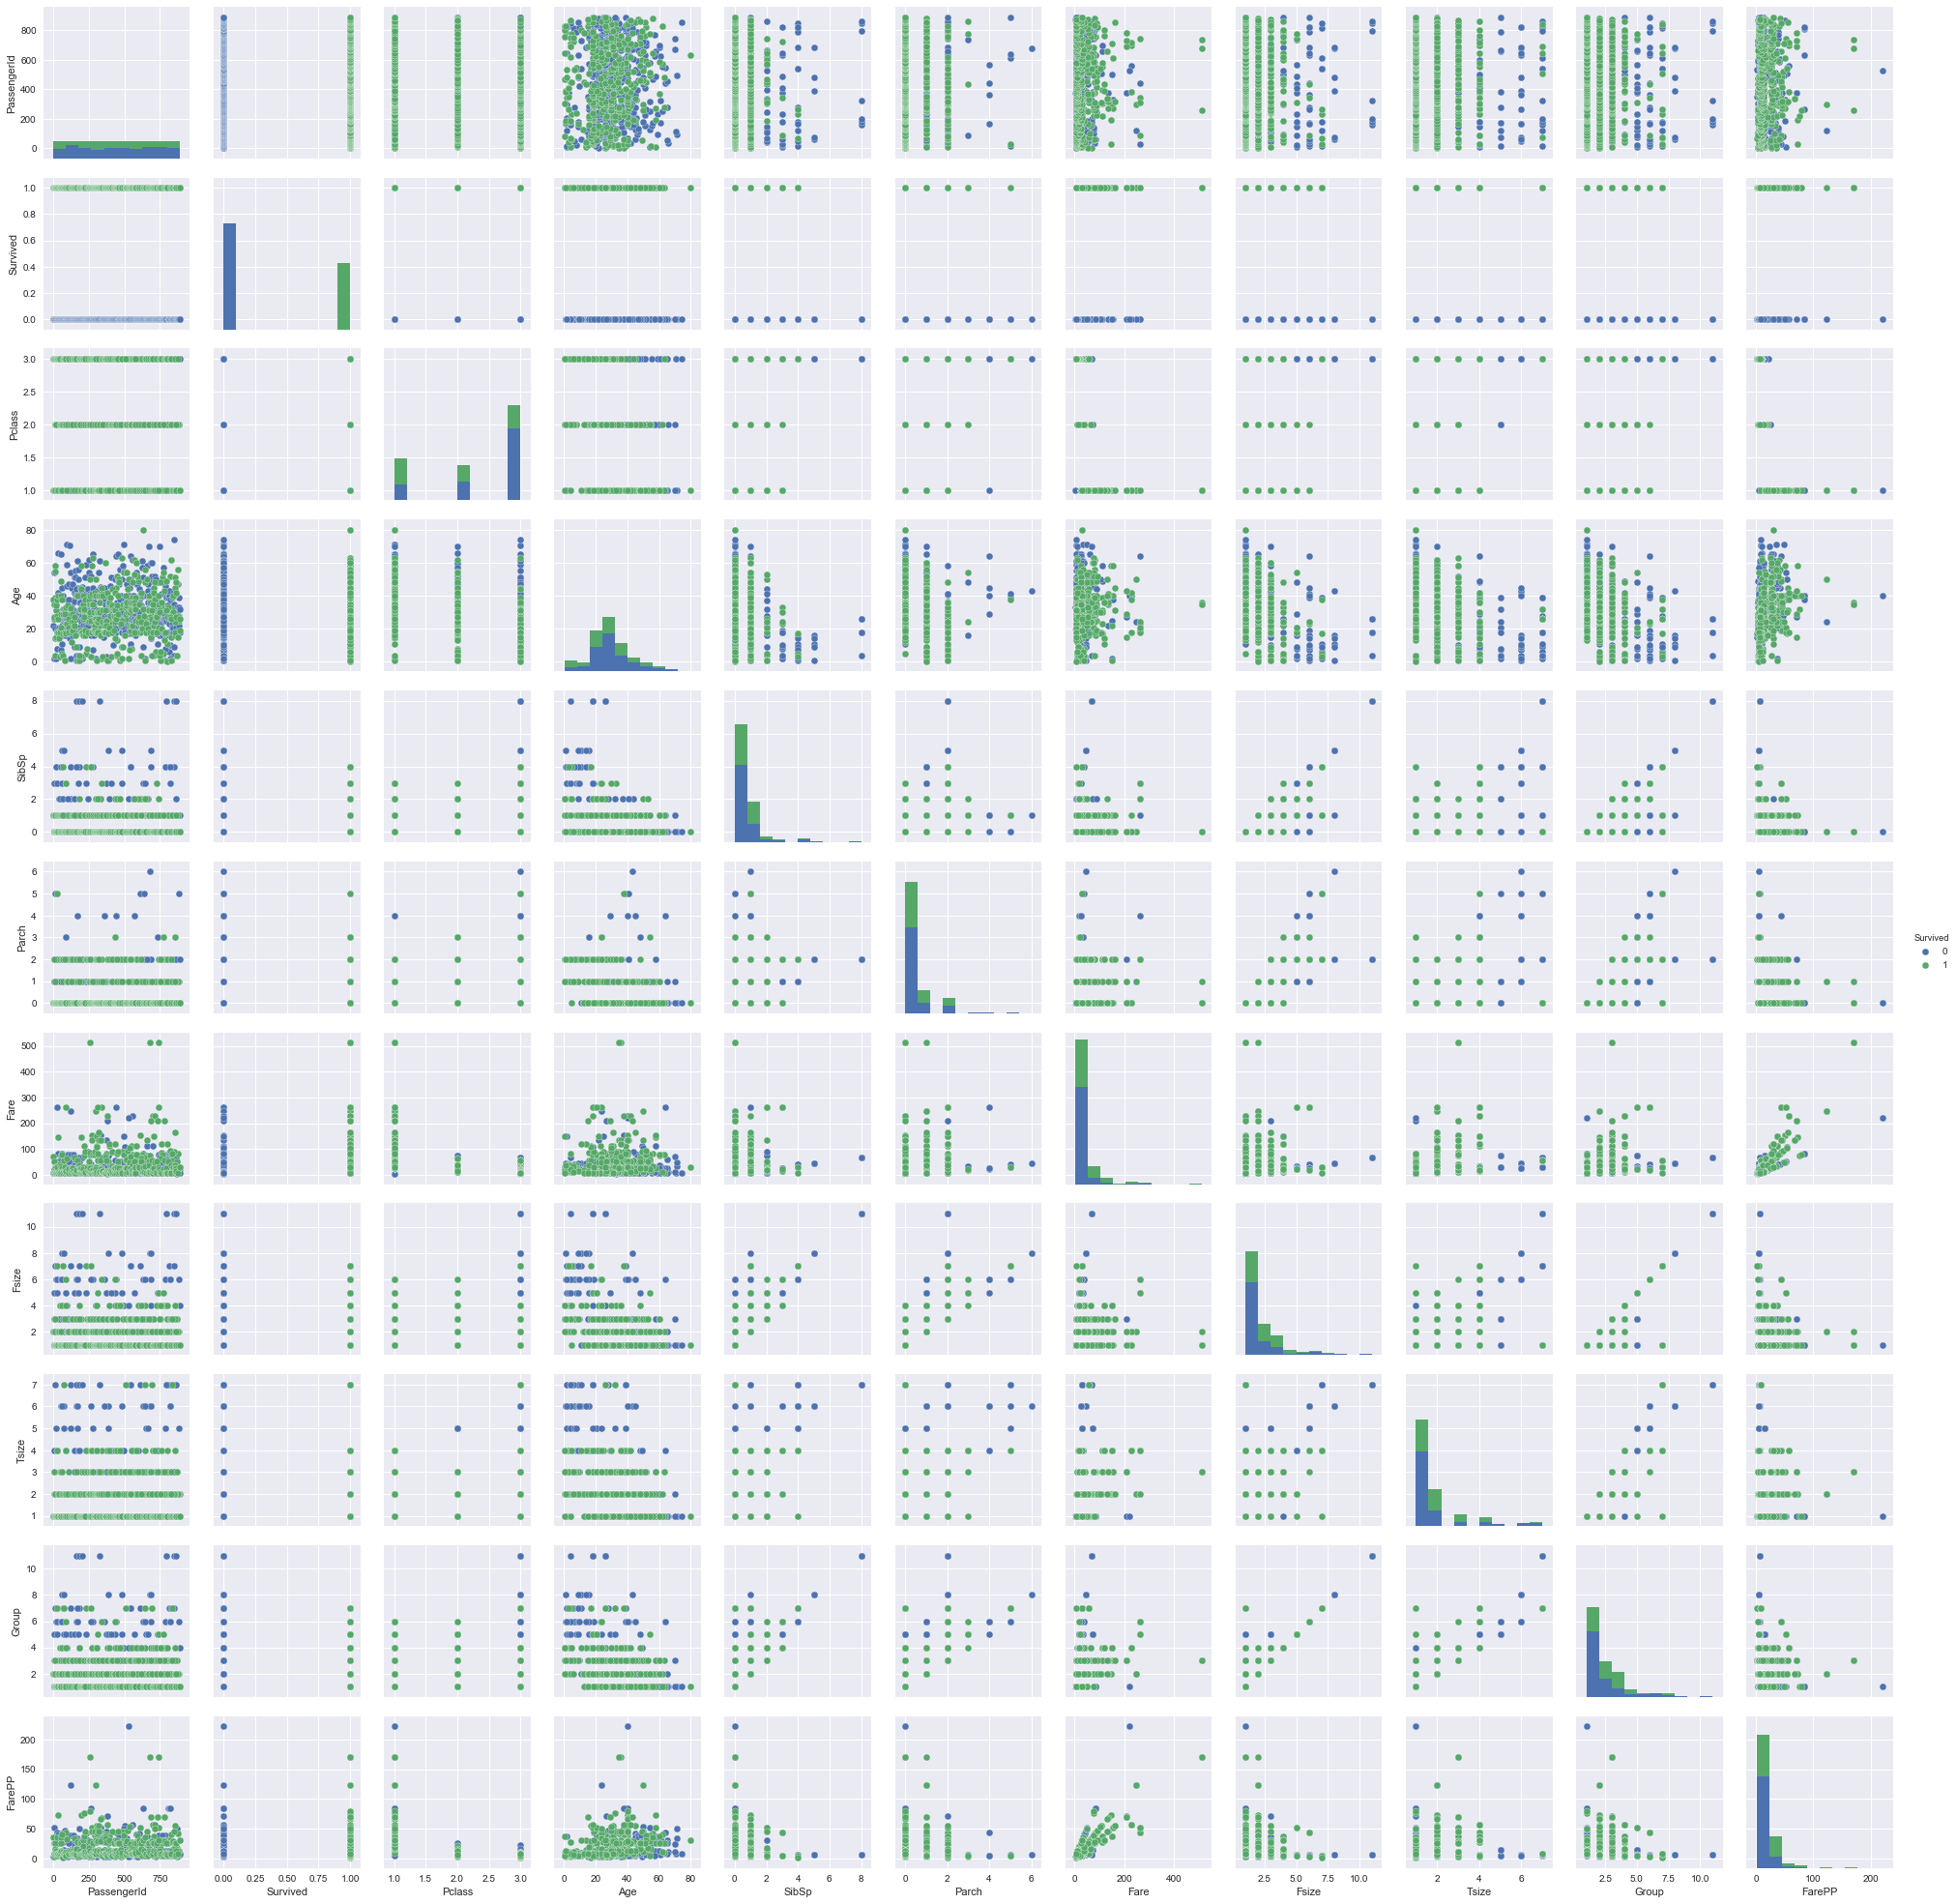

In [113]:
sns.pairplot(df, hue='Survived');

### Contingency Table

In [114]:
survived_class = pd.crosstab(index=df["Survived"], 
                            columns=df["Title"],
                             margins=True) 
survived_class

Title,Master,Miss,Mr,Mrs,Rare Title,All
Survived,,,,,,
0,17,55,436,26,15,549
1,23,129,81,100,9,342
All,40,184,517,126,24,891


# Visualization
## Outline

* Distribution of Data
 * Univariate
 * Bivariate
 * Pairwise Bivariate
* Plotting w/ Categorical data
 * Categorical Scatterplots
 * Category wise distribution of observations
 * Category wise statistical estimation
 * Multi-panel categorical plots

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set()
%matplotlib inline

In [116]:

data = pd.read_csv('train.csv')
df = data.copy()
df['Title'] = df['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)
df["Embarked"] = df["Embarked"].fillna('C')
print(data.shape)
df.head(2)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


## Distribution of Data

### Univariate

**Histogram & KDE (Kernel Density Estimate)**

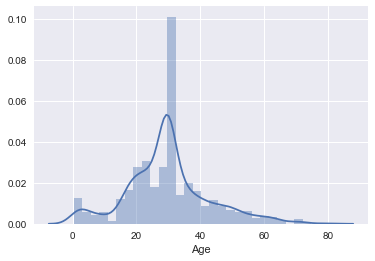

In [117]:
sns.distplot(df['Age']);

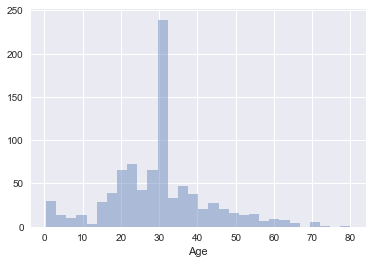

In [118]:
sns.distplot(df['Age'], kde=False);

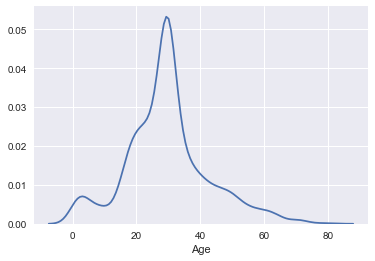

In [119]:
sns.distplot(df['Age'], hist=False);

The bandwidth (bw) parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above. The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values:

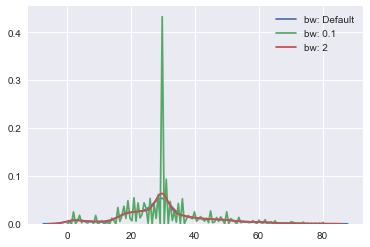

In [120]:
sns.kdeplot(df['Age'], label="bw: Default")
sns.kdeplot(df['Age'], bw=.1, label="bw: 0.1")
sns.kdeplot(df['Age'], bw=2, label="bw: 2")
plt.legend();

**Histogram with rugplot**


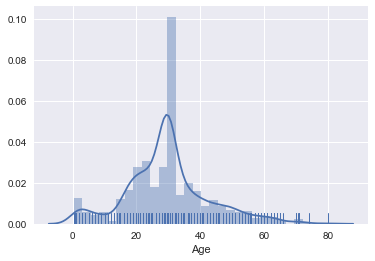

In [121]:
sns.distplot(df['Age'], rug=True);

### Bivariate

It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the `jointplot()` function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

**Scatterplots ( ~ rugplots in 2D )**

`Jointplot()` defaults to a scatterplot.

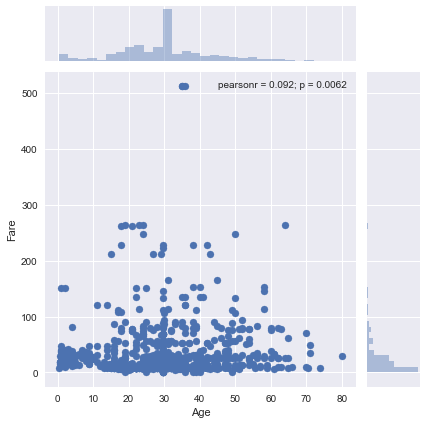

In [122]:
sns.jointplot(x="Age", y="Fare", data=df);

**Hexbin Plots ( ~ Histogram in 2D )**

The bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It’s available through the matplotlib plt.hexbin function and as a style in jointplot(). It looks best with a white background:

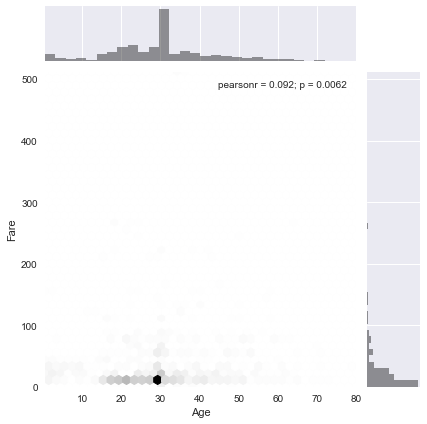

In [123]:
sns.jointplot(x="Age", y="Fare", data=df, kind="hex", color="k");

**Contours ( ~ KDE in 2D )**

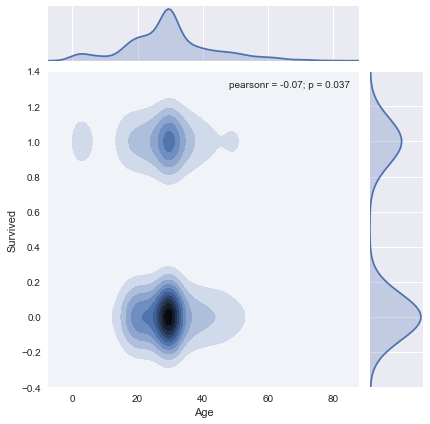

In [124]:
sns.jointplot(x="Age", y="Survived", data=df, kind="kde");

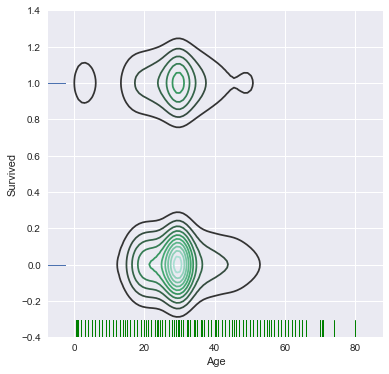

In [125]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.Age, df.Survived, ax=ax)
sns.rugplot(df.Age, color="g", ax=ax)
sns.rugplot(df.Survived, vertical=True, ax=ax);

### Pairwise Bivariate

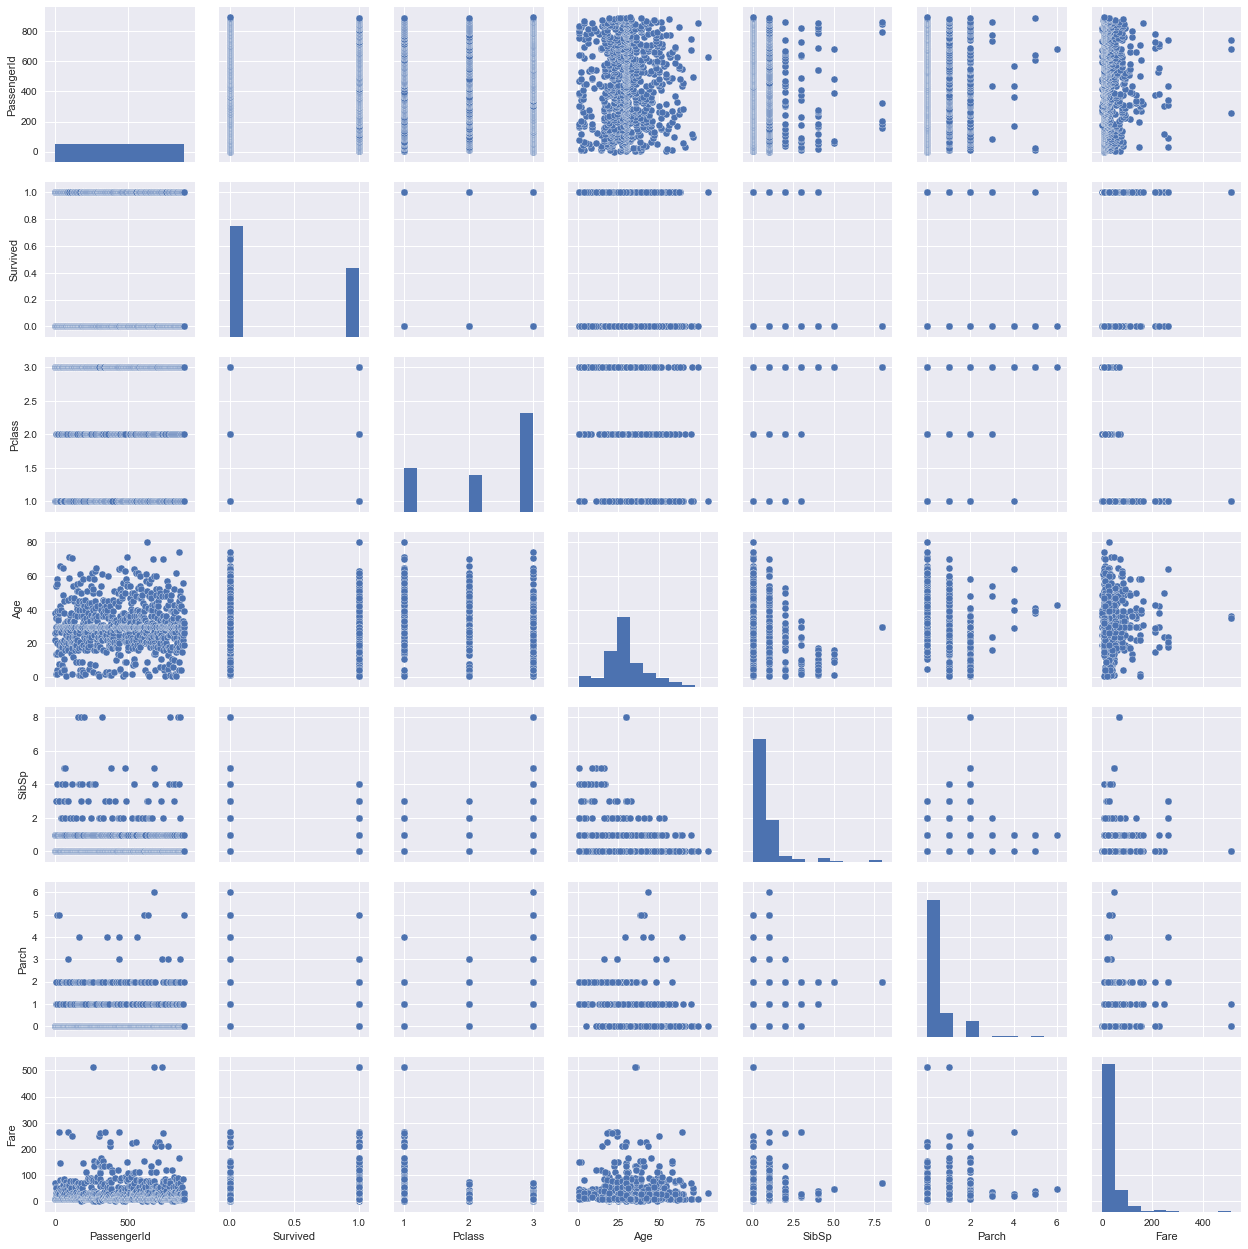

In [126]:
sns.pairplot(df);

# Visualizations against each variable type

#### Categorical Variable

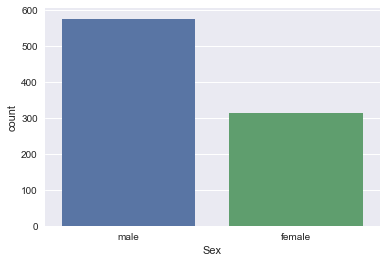

In [127]:
sns.countplot(x='Sex',data=df);

#### 2 categorical Variables

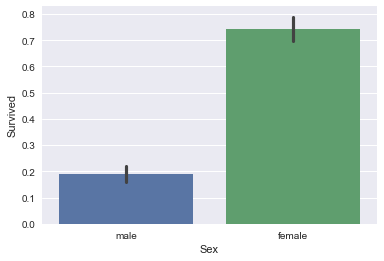

In [128]:
sns.barplot(x="Sex", y="Survived", data=df);

#### 1 Numerical variable

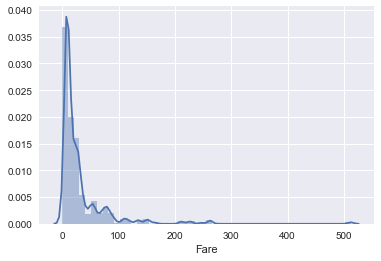

In [129]:
sns.distplot(df['Fare']);

#### 2 Numerical variables

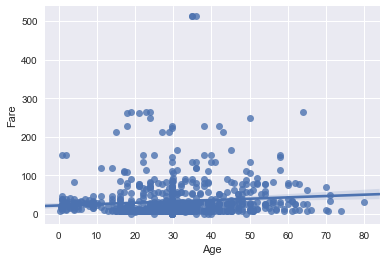

In [130]:
sns.regplot(x="Age", y="Fare", data=df);

#### 1 numeric and 1 categorical variable

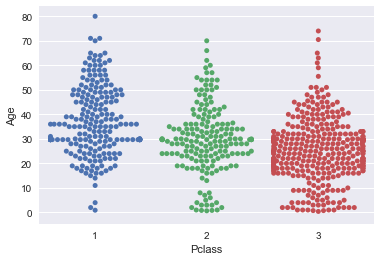

In [131]:
sns.swarmplot(data=df, x='Pclass', y='Age');